In [99]:
%matplotlib inline

import numpy as np
import scipy.misc
import importlib
import timeit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'verdana'})
rc('text', usetex=False)
rc('text.latex',unicode=True)
rc('text.latex',preamble=u'\\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=u'\\usepackage[russian]{babel}')
rc('xtick', labelsize=12)

In [43]:
def test(task):
    global v1_vector, v2_non_vector, v3_part_vector
    global data
    importlib.reload(task)
    v1_vector = task.v1_vector
    v2_non_vector = task.v2_non_vector
    v3_part_vector = task.v3_part_vector
    
    CNT = 5
    y_vector = np.array([])
    for i in range(0, CNT):
        data = task.gen(i)
        time = %timeit -o -q v1_vector(*data)
        y_vector = np.append(y_vector, time.best)
        
    y_non_vector = np.array([])
    for i in range(0, CNT):
        data = task.gen(i)
        time = %timeit -o -q v2_non_vector(*data)
        y_non_vector = np.append(y_non_vector, time.best)
    
    y_part_vector = np.array([])
    for i in range(0, CNT):
        data = task.gen(i)
        time = %timeit -o -q v3_part_vector(*data)
        y_part_vector = np.append(y_part_vector, time.best)
        
    x = np.arange(0, CNT)
    scale = 1000
    print(y_vector * scale )
    print(y_non_vector * scale)
    print(y_part_vector * scale)
    plt.semilogy(x, y_vector * scale, '-o', label='Векторизованный вариант', linewidth=2)
    plt.semilogy(x, y_non_vector * scale, '-o', label='Без векторизации', linewidth=2)
    plt.semilogy(x, y_part_vector * scale, '-o', label='Частичная векторизация', linewidth=2)
    plt.xlabel(u"Объём данных", fontsize=13)
    plt.ylabel(u"Время работы (ms)", fontsize=13)
    plt.yticks(fontsize=11)
    plt.legend(loc=2)
    plt.savefig('task.pdf', format = 'pdf')
    plt.show()
    

#Задача 1

[ 0.03792409  0.0398566   0.05919941  0.15895412  0.72903095]
[ 0.05975243  0.19392075  0.98165905  1.83549764  9.57761705]
[ 0.05127084  0.11928522  0.50027568  0.9807633   4.99444361]


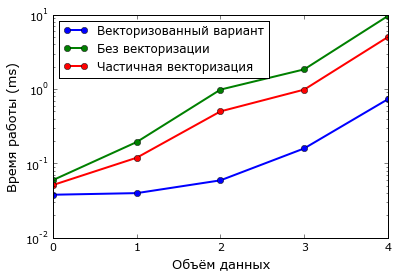

In [26]:
import task1
test(task1)

#Задача 2

[ 0.01833964  0.0210123   0.04038384  0.0729145   0.44207351]
[  0.13481114   0.22685828   1.13235966   2.2082408   12.17925289]
[  4.80631302e-02   7.15661964e-02   4.50396987e-01   5.05680979e+00
   1.25304319e+02]


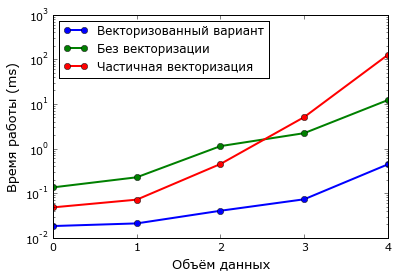

In [31]:
import task2
test(task2)

#Задача 3

[  0.07848863   0.09608281   0.16243734   1.18948077  12.73488669]
[  2.95710828e-02   3.02957804e-01   2.56760186e+00   1.86361089e+01
   1.80517552e+02]
[  0.06516594   0.11796549   0.28853626   2.84807864  28.36954446]


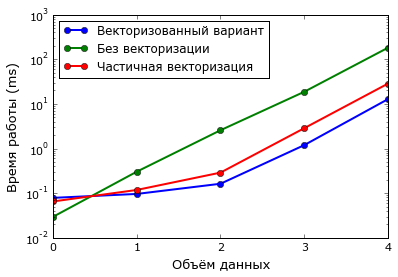

In [32]:
import task3
test(task3)

#Задача 4

[ 0.0476144   0.04797646  0.06454501  0.27110247  2.19629555]
[  3.21116867e-02   1.50501501e-01   1.35955720e+00   1.35312501e+01
   1.34167296e+02]
[  0.03531951   0.05126845   0.17866818   1.81937868  14.42737772]


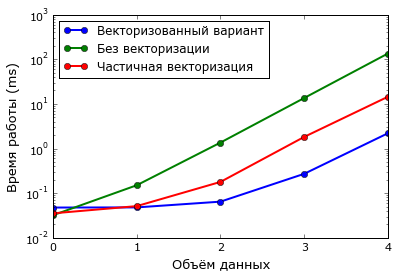

In [33]:
import task4
test(task4)

#Задача 5

[  0.07591182   0.09473542   0.26929329   2.27443289  21.13881294]
[  6.03339539e+00   3.91971879e+01   4.19107271e+02   3.34189533e+03
   3.29625375e+04]
[  0.12309704   0.18870857   0.62832593   3.31669741  36.66211474]


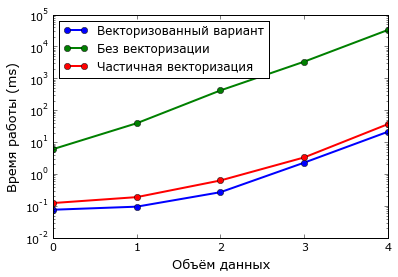

In [37]:
import task5
test(task5)

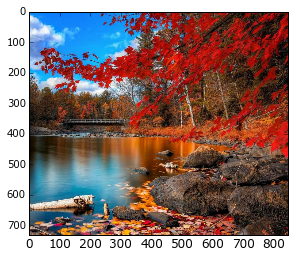

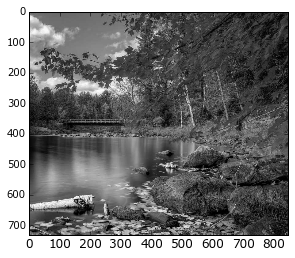

In [2]:
import task5
img = scipy.misc.imread("C:\\prak\\prak\\lab1\\pictures\\red_autumn_leaves_water2.png")
ch = np.array([0.299, 0.587, 0.114])
plt.imshow(img)
scipy.misc.imsave("C:\\prak\\prak\\lab1\\pictures\\red_autumn_leaves_water.png", img)
plt.show()
plt.gray()
img2 = task5.v1_vector(img, ch)
plt.imshow(img2)
scipy.misc.imsave("C:\\prak\\prak\\lab1\\pictures\\gray_autumn_leaves_water.png", img2)
plt.show()


#Задача 6

[  1.23321521e-01   2.09067558e-01   1.01470321e+00   1.24227422e+01
   1.36017128e+02]
[  6.92165455e-01   7.25032286e+00   7.27439012e+01   7.14479412e+02
   7.55706324e+03]
[  7.85082405e-01   6.83995929e+00   6.77309439e+01   6.70307640e+02
   7.12114709e+03]


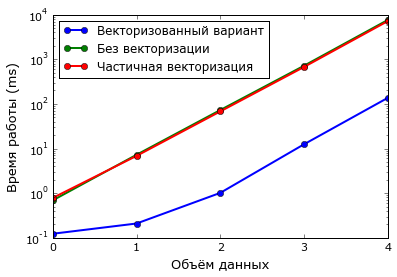

In [40]:
import task6
test(task6)

#Задача 7

[  9.05923875e-02   5.81828393e-01   5.40134049e+00   5.43346438e+01
   5.44376752e+02]
[  4.57045845e-01   4.41502764e+00   4.24770859e+01   4.45943318e+02
   4.40608324e+03]
[ 0.10643407  0.10779041  0.1474462   0.57412242  3.90673581]


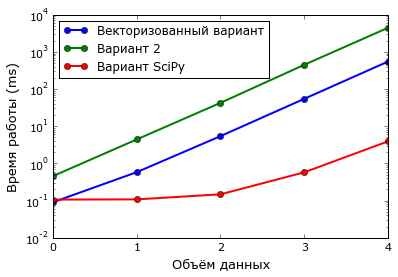

In [47]:
import task7
test(task7)

#Задача 8

In [100]:
import task8
test(task8)

###Вычисление погрешности

In [92]:
import task8
importlib.reload(task8)
v1_vector = task8.v1_vector
v2_non_vector = task8.v2_non_vector
v3_scipy = task8.v3_part_vector

CNT = 5
y1a = np.array([])
y2a = np.array([])
y1 = np.array([])
y2 = np.array([])
for i in range(0, CNT):
    for j in range(20):
        data = task8.gen(i)
        ans1 = v1_vector(*data)
        ans2 = v2_non_vector(*data)
        ans3 = v3_scipy(*data)
        np.testing.assert_allclose(ans1, ans3)
        np.testing.assert_allclose(ans2, ans3)
        y1 = np.append(y1, np.linalg.norm(ans1 - ans3))
        y2 = np.append(y2, np.linalg.norm(ans2 - ans3))
print(np.max(y1), np.min(y1))
print(np.max(y2), np.min(y2))

2.21069018183e-13 0.0
1.1804422489e-13 0.0


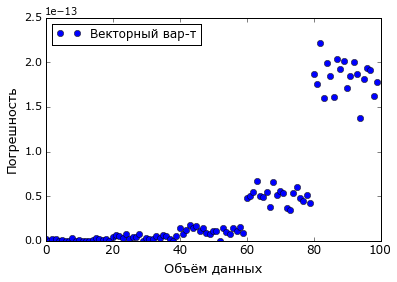

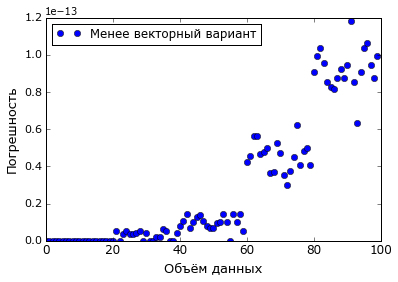

In [96]:
plt.plot(np.arange(0, y1.shape[0]), y1, 'o', label='Векторный вар-т', linewidth=2)
plt.xlabel(u"Объём данных", fontsize=13)
plt.ylabel(u"Погрешность", fontsize=13)
plt.yticks(fontsize=11)
plt.legend(loc=2)
plt.show()
plt.plot(np.arange(0, y2.shape[0]), y2, 'o', label='Менее векторный вариант', linewidth=2)
plt.xlabel(u"Объём данных", fontsize=13)
plt.ylabel(u"Погрешность", fontsize=13)
plt.yticks(fontsize=11)
plt.legend(loc=2)
plt.show()